# In this notebook I'll predect the chance of heart attack using two different classifications on the heart_attack dataset

## Problem(heart attack disease)

- What is heart attack?

A heart attack, occurs when blood flow to a part of the heart is blocked, depriving the heart muscle of oxygen and nutrients. This can lead to damage to the heart muscle or even the death of heart tissue. The most common cause of a heart attack is a blockage in the coronary artery, which transports oxygen-rich blood to the heart. Symptoms of a heart attack include chest pain, shortness of breath, sweating, nausea, dizziness, and fainting. A heart attack is a serious medical condition that requires immediate treatment.

## About this dataset

Dataset contains information about both those who have a heart attack and those who do not have a heart attack. There are 303 datapoints and 14 features in the heart.csv.

## Features



* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trtbps : resting blood pressure (in mm Hg)


* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 
* thalach : maximum heart rate achieved

* oldpeak : Previous peak

* slp : Slope

* caa : Number of major vessels

* thall : Thalium Stress Test result (0,3)

* target : 0= less chance of heart attack 1= more chance of heart attack

## hypothesis

Based on the scikit-learn algorithm cheat-sheet diagram (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), it seems that using the SVM (SVC) classifier could potentially yield the best results for your particular machine learning task.

Furthermore, I have opted to include the Logistic Regression classifier as a potential choice, even though it is not explicitly recommended on the scikit-learn cheat-sheet. This decision was based on my familiarity with the classifier, having worked with it extensively during the bootcamp and recent lectures. Additionally, my research indicates that Logistic Regression is a widely used and effective option for solving binary classification problems such as the one at hand. Its straightforwardness and ease of understanding make it an attractive option for many practical uses.

In my opinion, SVM will get better results than Logistic Regression because it is mentioned in the cheat-sheet.

## 1. Data understanding

In [3]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import itertools
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
plt.style.use('fivethirtyeight')

In [4]:
# Load the data in
df = pd.read_csv('heart.csv')

In [5]:
# Data shape
df.shape

(303, 14)

In [6]:
# Preview of the first 10 rows of the data
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We can see that we don't need to change the datatype of any column. There is no Strings values.

In [8]:
df.describe() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2. Data preparation

In [9]:
# Change some columns names
df.rename(columns={"cp": "chest_pain",
                   "trtbps":"blood_pressure",
                   "chol":"cholestoral",
                   "fbs":"fasting_blood_sugar",
                   "thalachh":"max_heart_rate",
                   "exng":"angina",
                   "caa": "n_vessels",
                   "output":"heart_attack"},
          inplace=True)

df.head()

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Test 1 (null values)
null_vallues = (df == 0).sum()

null_vallues

age                      0
sex                     96
chest_pain             143
blood_pressure           0
cholestoral              0
fasting_blood_sugar    258
restecg                147
max_heart_rate           0
angina                 204
oldpeak                 99
slp                     21
n_vessels              175
thall                    2
heart_attack           138
dtype: int64

We can see that it is not necessary to replace the null value with e.g. mean. Because in this dataset, the null actually means something.

In [11]:
# Test 2 (nan values)
nan_values = df.isna().sum()

nan_values

age                    0
sex                    0
chest_pain             0
blood_pressure         0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
angina                 0
oldpeak                0
slp                    0
n_vessels              0
thall                  0
heart_attack           0
dtype: int64

In [12]:
# Summary statistics for continuous features
con_cols = ['age','blood_pressure','cholestoral','max_heart_rate']
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


## 3. Exploratory Data Analysis

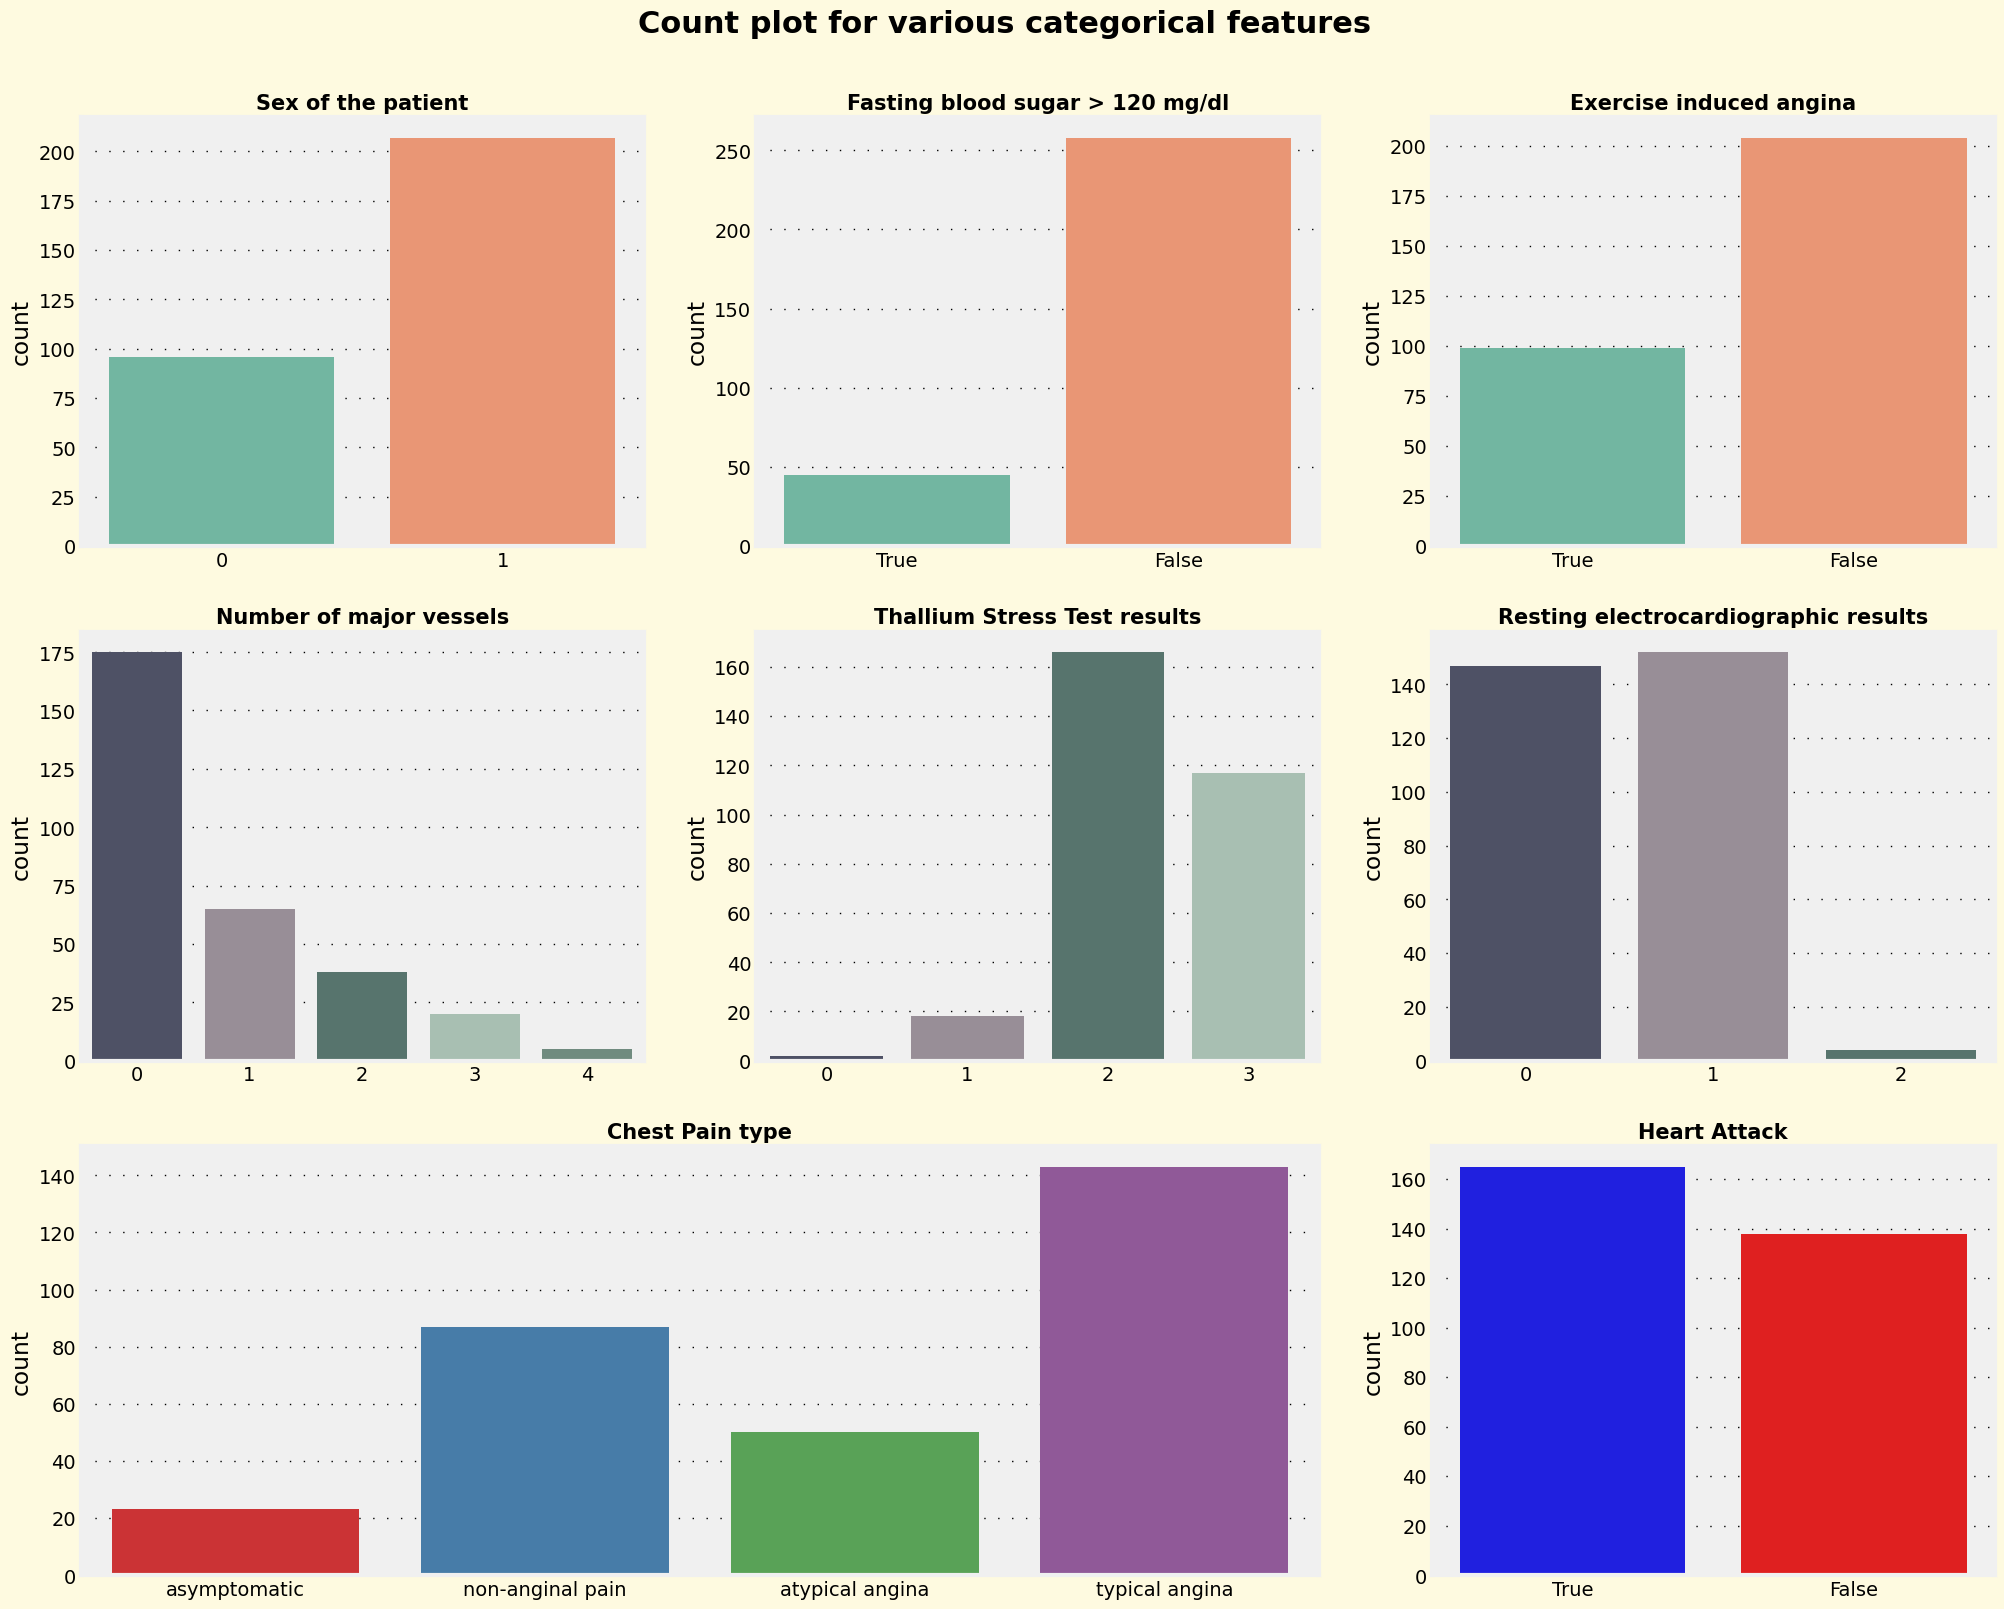

In [13]:
# count plot of categorical features
fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,:-1])
ax8 = fig.add_subplot(gs[2,2])

fig.suptitle(t='Count plot for various categorical features',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")
color_platte = ['#4a4e69','#9a8c98','#52796f','#a4c3b2','#6b9080']

# Sex 
ax1.set_title('Sex of the patient',fontweight ="bold",fontsize=15)
ax1.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax1,data=df,x='sex',palette = 'Set2')
ax1.set_xlabel("")



# fasting blood sugar 
ax2.set_title('Fasting blood sugar > 120 mg/dl',fontweight ="bold",fontsize=15)
ax2.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax2,data=df,x='fasting_blood_sugar',order=[True,False],palette = 'Set2')
ax2.set_xlabel("")

# angina 
ax3.set_title('Exercise induced angina',fontweight ="bold",fontsize=15)
ax3.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax3,data=df,x='angina',order=[True, False],palette = 'Set2')
ax3.set_xlabel("")

# numbers of vessels 
ax4.set_title('Number of major vessels',fontweight ="bold",fontsize=15)
ax4.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax4,data=df,x='n_vessels',palette = color_platte)
ax4.set_xlabel("")

# thall 
ax5.set_title('Thallium Stress Test results',fontweight ="bold",fontsize=15)
ax5.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax5,data=df,x='thall',palette = color_platte)
ax5.set_xlabel("")

# restecg 
ax6.set_title('Resting electrocardiographic results',fontweight ="bold",fontsize=15)
ax6.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax6,data=df,x='restecg',palette = color_platte)
ax6.set_xlabel("")

# chest pain
leges = {0: 'typical angina',1: 'atypical angina',2: 'non-anginal pain',3: 'asymptomatic'}
ax7.set_title('Chest Pain type',fontweight ="bold",fontsize=15)
ax7.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax7,data=df.assign(chest_pain = df['chest_pain'].replace(leges)),x='chest_pain',palette = 'Set1')
ax7.set_xlabel("")

# Heart Attack 
ax8.set_title('Heart Attack',fontweight ="bold",fontsize=15)
ax8.grid(color='#000000', linestyle='dashed', axis='y',dashes=(1,9))
sns.countplot(ax=ax8,data=df,x='heart_attack',order=[True, False],palette = ['blue','red'])
ax8.set_xlabel("")
plt.show()

<b> This plot shows the categorical features of the dataset. We can see that in the "Sex" feature, Category 1 is significantly larger than Category 0.

In [14]:
# correlation between features and heart attack
cor = df.corr()
print(cor["heart_attack"].sort_values(ascending=False))

heart_attack           1.000000
chest_pain             0.433798
max_heart_rate         0.421741
slp                    0.345877
restecg                0.137230
fasting_blood_sugar   -0.028046
cholestoral           -0.085239
blood_pressure        -0.144931
age                   -0.225439
sex                   -0.280937
thall                 -0.344029
n_vessels             -0.391724
oldpeak               -0.430696
angina                -0.436757
Name: heart_attack, dtype: float64


<AxesSubplot: >

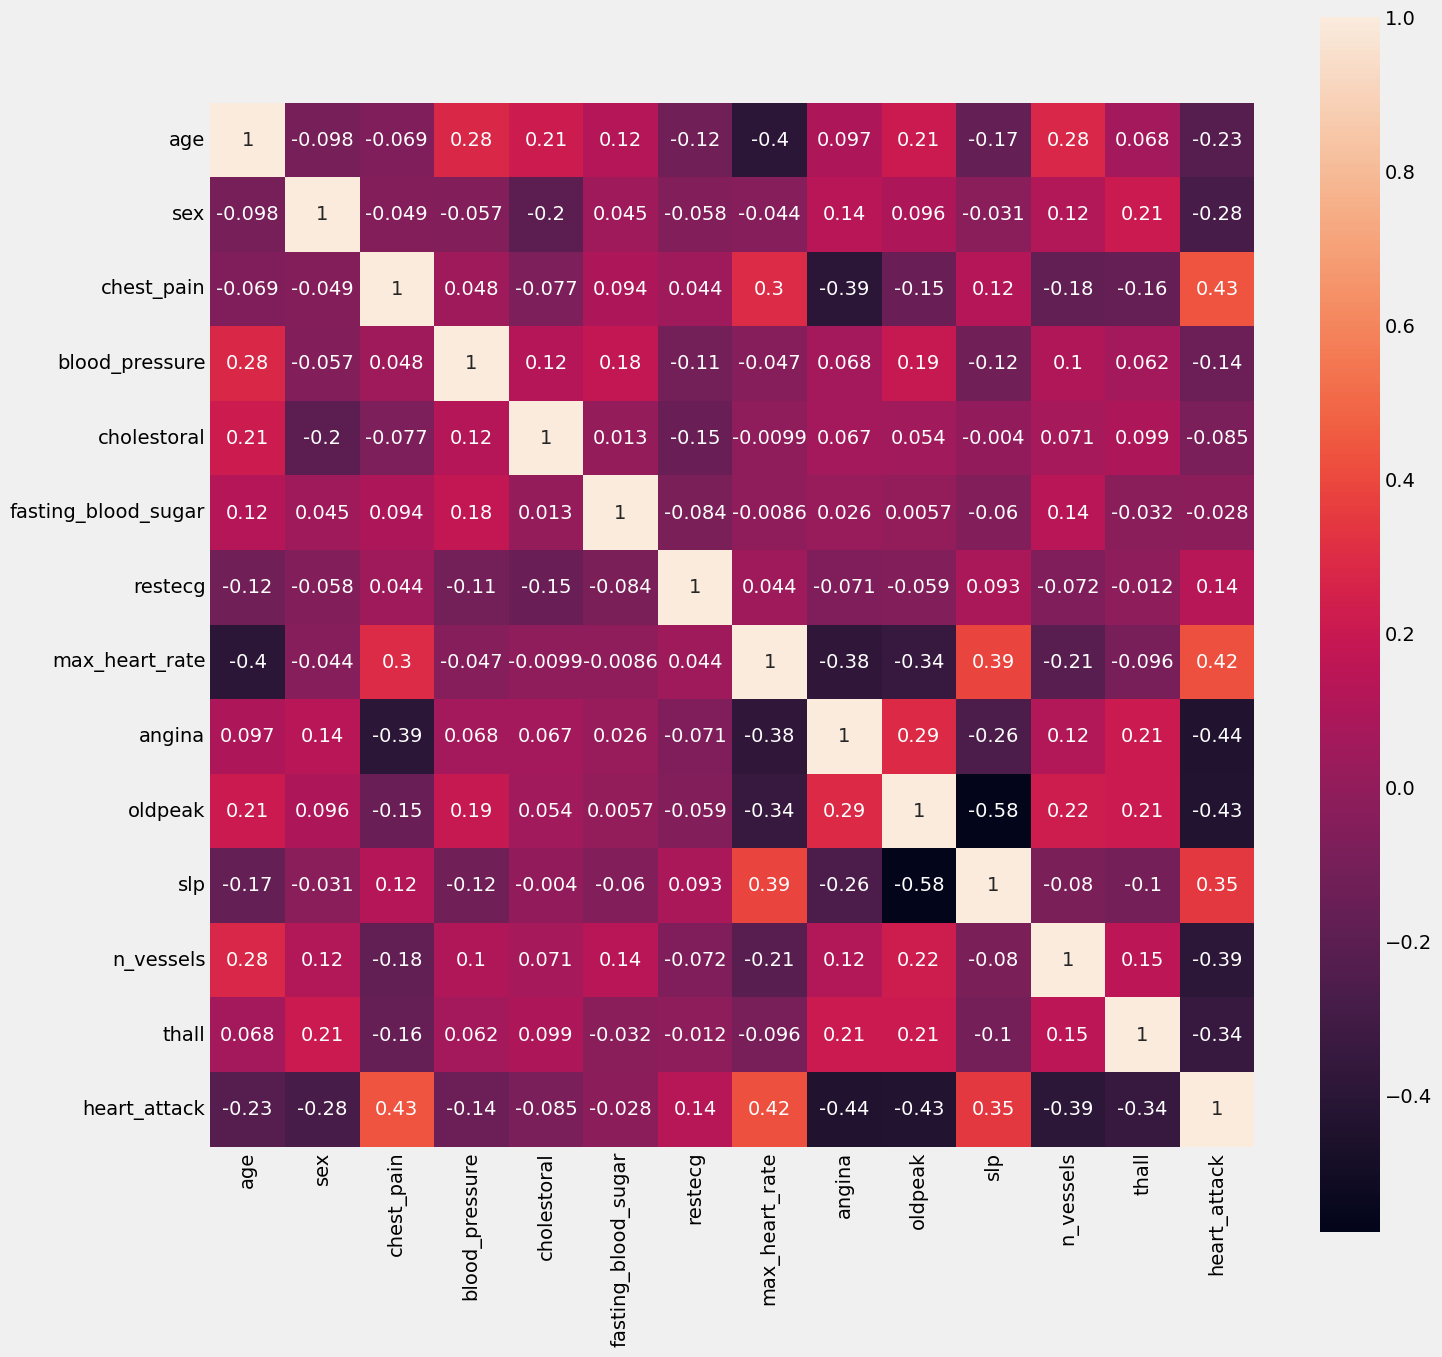

In [31]:
# Heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, square = True)

<b> 

The heatmap shows the postive correlation between the heart_attack feature and the following features: 

- chest_pain

- max_heart_rate

- slp

The heatmap shows also the negative correlation between the heart_attack feature and the following features: 

- angina

- oldpeak

- n_vessels




## 4.1 Modeling & Validation (SVM)

In [16]:
# split data to 80% train data & 20% test data randomly (to build & evaluate Model)
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# preview of the first 7 rows of train data
x_train.merge(y_train,left_index=True,right_index=True).head(7)

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,heart_attack
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1


In [18]:
# preview of the first 7 rows of test data
x_test.merge(y_test,left_index=True,right_index=True).head(7)

,age,sex,chest_pain,blood_pressure,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,angina,oldpeak,slp,n_vessels,thall,heart_attack
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1


SVM is a powerful machine learning algorithm suitable for both linear and nonlinear classification problems. SVM looks for a dividing line that properly separates the two classes of data points by using an optimal margin between the data points and the dividing line.
It can also be effective in dealing with noise and outliers in the data.

In [19]:
# build Model (Support Vector Machines)
mdl = make_pipeline(StandardScaler(), SVC())

mdl.fit(x_train,y_train)
y_pred = mdl.predict(x_test)

In [20]:
# get classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [21]:
# evaluated Score Train DataSet by Model
print('Score TrainDataSet: ',mdl.score(x_train,y_train))

Score TrainDataSet:  0.9214876033057852


In [22]:
# evaluated Score Test DataSet by Model
print('Score TestDataSet: ',mdl.score(x_test,y_test))

Score TestDataSet:  0.8688524590163934


## 4.2 Modeling & Validation (Logistic Regression)

The other model that I choose is, Logistic Regression. Logistic regression is a popular choice for binary classification problems like this one. It is easy to understand and implement, and it provides interpretation of the coefficients. In this case, logistic regression could be used to predict the likelihood of a person having a heart attack given their characteristics.

In [23]:
# build Model (Logistic Regression)
mdl = LogisticRegression()
mdl.fit(x_train,y_train)

c:\Users\Aghoo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# test the model on the testset.
pred = mdl.predict(x_test)

In [25]:
# evaluated Score Train DataSet by Model
print('Score TrainDataSet: ',mdl.score(x_train,y_train))

Score TrainDataSet:  0.8553719008264463


In [26]:
# evaluated Score Test DataSet by Model
print('Score TestDataSet: ',mdl.score(x_test,y_test))

Score TestDataSet:  0.8852459016393442


In [27]:
# preview the coefficients from the model
coeff = pd.DataFrame({"coeff":mdl.coef_[0], "label":x_train.columns})
print(coeff.sort_values(by = "coeff"))
                        
intercept = mdl.intercept_
print("\nIntercept: ", intercept[0])

       coeff                label
1  -1.209445                  sex
12 -1.016679                thall
8  -0.833442               angina
11 -0.745207            n_vessels
9  -0.670417              oldpeak
3  -0.011497       blood_pressure
5  -0.001823  fasting_blood_sugar
4  -0.001775          cholestoral
0   0.009773                  age
7   0.027549       max_heart_rate
6   0.542234              restecg
10  0.622613                  slp
2   0.769712           chest_pain

Intercept:  0.028975627712057517


Seeing the table above we can see how heavily the model weighs the various features in the model. With the we can write the following formula:

formula = 0.03 + -1.21 * sex + -1.02 * thall + -0.83 * angina + -0.75 * n_vessels + -0.67 * oldpeak + -0.01 * blood_pressure + -0.00 * fasting_blood_sugar + -0.00 * cholestoral + 0.01 * age + 0.03 max_heart_rate + 0.54 * restecg + 0.62 * slp + 0.77 * chest_pain

In [28]:
# correlationmatrix
cor = df.corr()
print(cor["heart_attack"].sort_values(ascending=False))

heart_attack           1.000000
chest_pain             0.433798
max_heart_rate         0.421741
slp                    0.345877
restecg                0.137230
fasting_blood_sugar   -0.028046
cholestoral           -0.085239
blood_pressure        -0.144931
age                   -0.225439
sex                   -0.280937
thall                 -0.344029
n_vessels             -0.391724
oldpeak               -0.430696
angina                -0.436757
Name: heart_attack, dtype: float64


In [29]:
# confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(cm, index=labels, columns=labels)
conf_df.index.name = "Actual"
conf_df.columns.name = "Predicted"
print(conf_df)

Predicted   0   1
Actual           
0          25   4
1           3  29


our model predicted that 4 people would have a heart attack, when that is not the case.
Also predicted that 3 people are not at risk of heart attack when that is not true.

<b>

Conclusion: 
SVC results : 0.87
Logistic Regression: 0.89

"Logistic Regression did perform better than SVC, but SVC also had good performance. It's possible that making changes to the model or the data itself could impact the results of both models."